In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load earthquake data
earthquake_data = pd.read_csv('all_earthquakes.csv')

# Convert 'time' column to datetime format and extract relevant features

# Split the data into features and target
X = earthquake_data[['longitude', 'latitude','time']]
y = earthquake_data['magnitude']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [2]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/50
77530/77530 [==============================] - 43s 548us/step - loss: 0.6949 - val_loss: 0.5769
Epoch 2/50
77530/77530 [==============================] - 42s 538us/step - loss: 0.6628 - val_loss: 0.5579
Epoch 3/50
77530/77530 [==============================] - 41s 527us/step - loss: 0.6592 - val_loss: 0.5682
Epoch 4/50
77530/77530 [==============================] - 41s 530us/step - loss: 0.6551 - val_loss: 0.5548
Epoch 5/50
77530/77530 [==============================] - 41s 531us/step - loss: 0.6551 - val_loss: 0.5895
Epoch 6/50
77530/77530 [==============================] - 41s 532us/step - loss: 0.6508 - val_loss: 0.5646
Epoch 7/50
77530/77530 [==============================] - 41s 532us/step - loss: 0.6501 - val_loss: 0.5537
Epoch 8/50
77530/77530 [==============================] - 41s 532us/step - loss: 0.6500 - val_loss: 0.5580
Epoch 9/50
77530/77530 [==============================] - 41s 532us/step - loss: 0.6497 - val_loss: 0.5544
Epoch 10/50
77530/77530 [============

In [3]:
# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a metric for performance evaluation
mse = np.mean((predictions - y_test.values.reshape(-1, 1))**2)
print("Mean Squared Error (MSE) on Test Set:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)


21536/21536 [==============================] - 7s 327us/step
Mean Squared Error (MSE) on Test Set: 0.5705270741623438
Root Mean Squared Error (RMSE) on Test Set: 0.7553324262616717


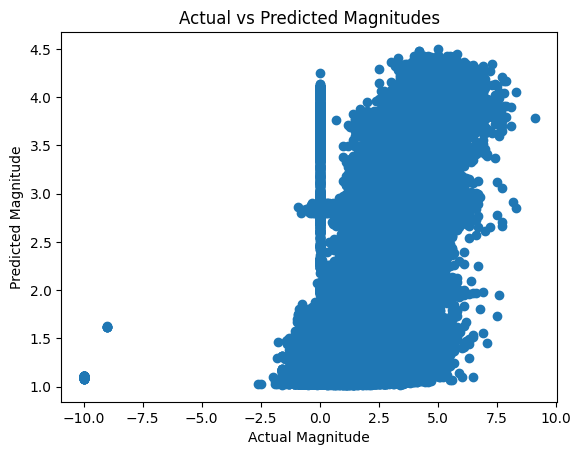

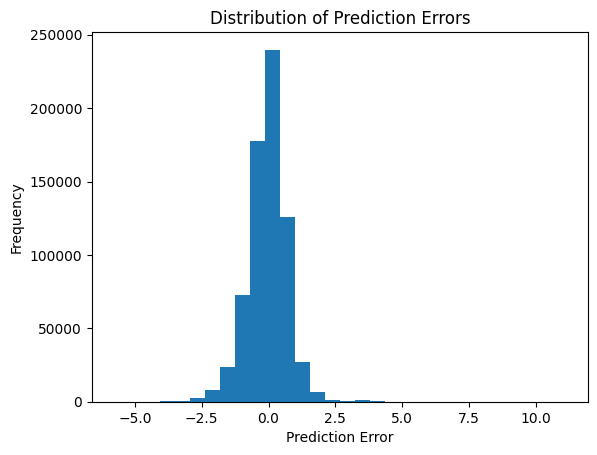

In [4]:
import matplotlib.pyplot as plt

# Plot predicted vs actual magnitudes
plt.scatter(y_test, predictions)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Magnitudes')
plt.show()

# Plot the distribution of errors
errors = predictions.flatten() - y_test.values
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


Predictions: [1.5246538 1.3023231 1.5454392 ... 3.2363386 1.0535704 1.3146799]
Actual Values: [1.48 1.47 2.4  ... 4.4  0.85 1.27]


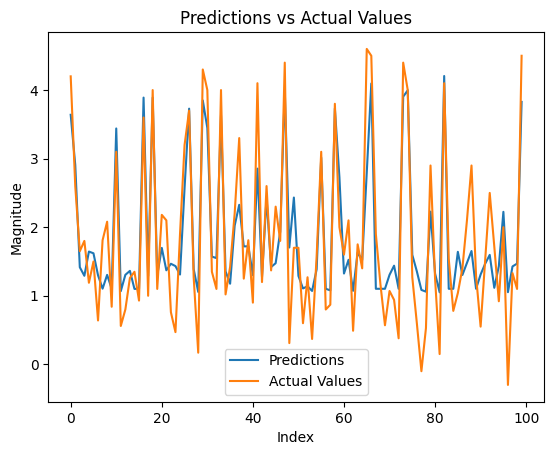

In [21]:
# print predictions and actual values

print("Predictions:", predictions.flatten())
print("Actual Values:", y_test.values)
# plot a signle line graph of pridictions and actual values of first 10 values
x = 10
plt.plot(predictions.flatten()[x:x + 100], label='Predictions')
plt.plot(y_test.values[x:x + 100], label='Actual Values')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

# save the model
# model.save('earthquake_model.h5')



In [36]:
import joblib
import pickle

# Save the model
joblib.dump(model, 'earthquake_model.pkl')

def getPrediction(long,lati,time):
    # Load the model
    # name 'load_model' is not defined
    # UnboundLocalError: cannot access local variable 'model' where it is not associated with a value

    model = pickle.load(open('earthquake_model.pkl', 'rb'))
    # Make a prediction
    prediction = model.predict(scaler.transform([[long, lati, time]]))
    return prediction[0][0]


# Test the function
long = 32.1024
lati = 77.5619
time = 1714060058622

prediction = getPrediction(long, lati, time)
print("Predicted Magnitude:", prediction)


1/1 [==============================] - 0s 26ms/step
Predicted Magnitude: 2.1171877


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
